# Setting up Custom Domains with App Engine

*January 29, 2016*

*A short guide based on my experience setting up w.s. undine with GAE and Namecheap.*

<hr>

When you deploy an app using the Google App Engine SDK, Google automatically assigns you a URL based on your project name. For this site, I was given www.ws-undine.appspot.com. This is fine for most projects, but I wanted my personal website to have its own domain because it looks better and is less to type.

Luckily, Google makes setting up custom domains relatively easy even for people (like me) who know little about how the internet is structured, what role domain registrars play, what a host record is...etc. However, getting it working did require a bit of trial and error.

First, log into the Google Developer's Console and access App Engine settings. There is a tab for “Custom domains” that lists the three steps you need to take.

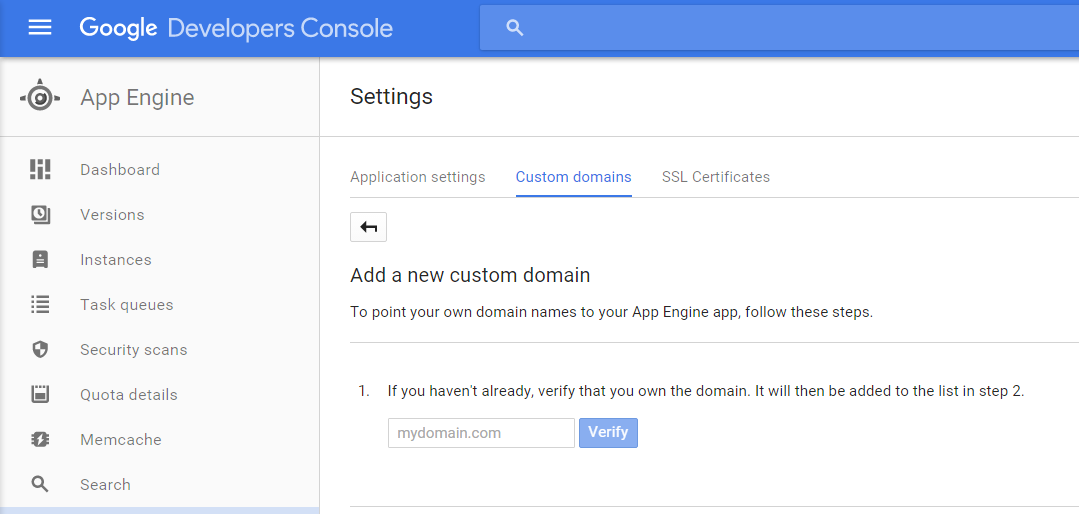

## Step 1 -  Verify that you own the domain

This step is not too difficult; Google gives you a string to append to your domain’s host record. I logged into my Namecheap account, “list domains”, “manage”, and “advanced DNS”. From here I added a new “TXT Record” with “@” and value = [the Google verification string].

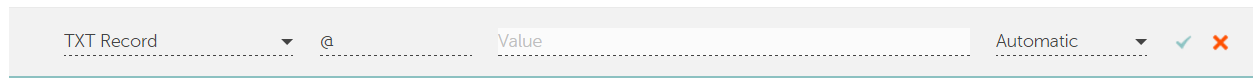

A few minutes later, Google confirmed the domain was verified.

## Step 2 - Set up the domain

This step is a bit more complicated. First off, head back to App Engine settings.

Google gives you two options:

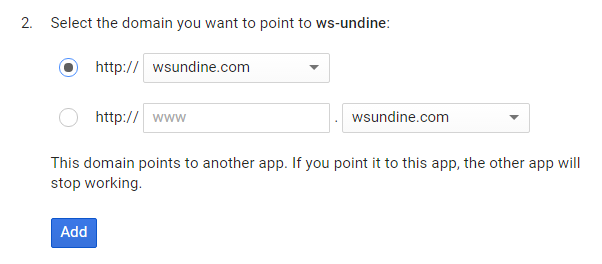

I didn't understand what the difference was at the time and went with the default option. Later on, I learned that this is for "naked domains". The difference is that “naked” domains have URLs without www. I googled for pros cons and found one site claiming that [naked domains are bad](http://www.yes-www.org/why-use-www/) and a Stack Overflow page implying the choice [doesn't really matter](http://webmasters.stackexchange.com/questions/60442/best-practice-for-using-www-domain-vs-naked-domain).

## Step 3 (for naked domains) - Add 8 host records to your domain

This process is basically the same as with the verification string.

Numerous times instructions warned me that changes could take minutes to hours to take effect. This was quite frustrating as I had no idea if the set-up was correct (and gestating) or faulty (and would never work). To pass the time I started reading the documentation more closely and realized that my host record had overlaps. I turned off the default Namecheap parking lot page and deleted the references to it in the host record. Then I went to bed.

### The next day

The site was still inaccessible. I realized that by default Namecheap redirects URLs to www.[sitename].com and that this was probably not what I wanted (having set it up as a naked domain in App Engine). I deleted the redirect, waited 30 minutes and tried again. Note that the default redirect is listed on the first options page and not the "advanced DNS" page.

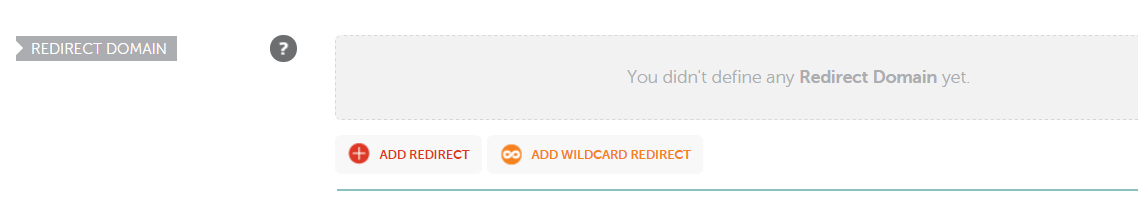

No luck. However, I noticed that Chrome navigated to the www version extremely quickly even if I explicitly entered the naked domain address. I tried again, this time in Firefox, and my website appeared.

My first impression was that the site was noticeably slower compared to its .appspot.com counterpart. A [discussion on Stack Overflow](http://stackoverflow.com/questions/1823441/appengine-performance-problem-same-site-10x-faster-accessing-from-appspot-than) indicated it might be a caching problem that will disappear over time.

### Another day passes

The slowness disappeared, so I guess it was a caching problem.

Chrome continues to automatically add “www” whenever I type my URL into the Omnibox. Hilariously, I have to do a Google search to access my own website despite knowing the URL. I tried cleaning Chrome’s user data, but the problem remains.

*Edit (Jan 30th, 2016):* I decided to change my configuration from naked domain to www. No real reason aside from a non-techy friend asking me "where is the www?"